Mean Squared Error for Warm Season: 2.3740956806405333
Mean Squared Error for Cold Season: 8.860609586201914


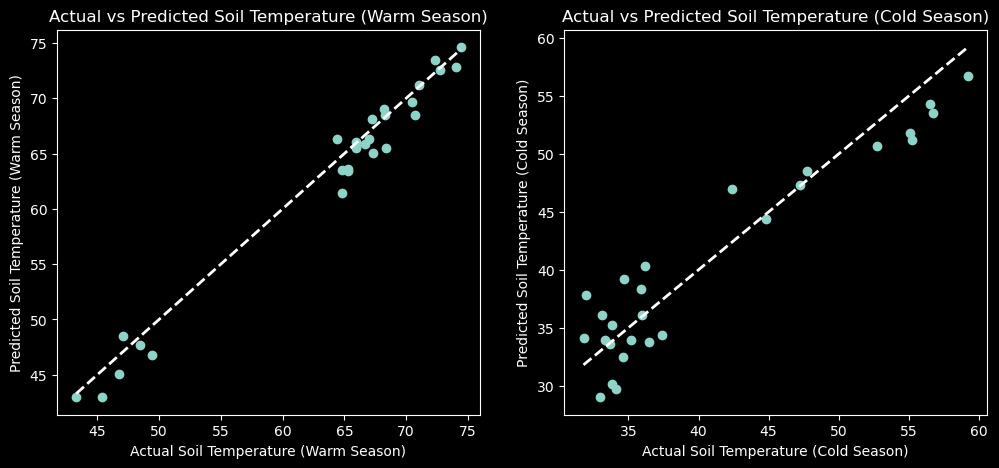

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

data = pd.read_csv('monthly.csv')

# making months for cold season/warm season
data['date'] = pd.to_datetime(data['date'])
warm_season = ['04', '05', '06', '07', '08', '09']
cold_season = ['10', '11', '12', '01', '02', '03']

# mapping months to warm/cold
data['month'] = data['date'].dt.month
data['season'] = data['month'].astype(str).str.zfill(2)
season_mapping = {1: 'cold', 2: 'cold', 3: 'cold', 4: 'warm', 5: 'warm', 6: 'warm', 7: 'warm', 8: 'warm', 9: 'warm', 10: 'cold', 11: 'cold', 12: 'cold'}
data['season'] = data['month'].map(season_mapping)

# dropping NaN values and extracting data to X and Y variables
data = data.dropna(subset=['s10t'])
X = data[['airt', 'prec', 'slrt', 'wspd']]
Y = data[['s10t']]

# segmenting data into seasons
warm_data = data[data['season'] == 'warm']
X_warm = warm_data[['airt', 'prec', 'slrt', 'wspd']]
Y_warm = warm_data[['s10t']]
X_train_warm, X_test_warm, Y_train_warm, Y_test_warm = train_test_split(X_warm, Y_warm, test_size=0.2, random_state=42)

cold_data = data[data['season'] == 'cold']
X_cold = cold_data[['airt']]
Y_cold = cold_data[['s10t']]
X_train_cold, X_test_cold, Y_train_cold, Y_test_cold = train_test_split(X_cold, Y_cold, test_size=0.2, random_state=42)

# training for warm season
LRmodel_warm = LinearRegression()
LRmodel_warm.fit(X_train_warm, Y_train_warm)
LRpredict_warm = LRmodel_warm.predict(X_test_warm)

# training for cold season
LRmodel_cold = LinearRegression()
LRmodel_cold.fit(X_train_cold, Y_train_cold)
LRpredict_cold = LRmodel_cold.predict(X_test_cold)

# evaluate and plot
mse_warm = mean_squared_error(Y_test_warm, LRpredict_warm)
mse_cold = mean_squared_error(Y_test_cold, LRpredict_cold)
print(f'Mean Squared Error for Warm Season: {mse_warm}')
print(f'Mean Squared Error for Cold Season: {mse_cold}')

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Warm Season
axs[0].scatter(Y_test_warm, LRpredict_warm) 
axs[0].plot([Y_test_warm.min(), Y_test_warm.max()], [Y_test_warm.min(), Y_test_warm.max()], 'k--', color='white', lw=2)  # y = x line
axs[0].set_xlabel('Actual Soil Temperature (Warm Season)')
axs[0].set_ylabel('Predicted Soil Temperature (Warm Season)')
axs[0].set_title('Actual vs Predicted Soil Temperature (Warm Season)')

# Plot for Cold Season
axs[1].scatter(Y_test_cold, LRpredict_cold)
axs[1].plot([Y_test_cold.min(), Y_test_cold.max()], [Y_test_cold.min(), Y_test_cold.max()], 'k--', color='white', lw=2)  # y = x line
axs[1].set_xlabel('Actual Soil Temperature (Cold Season)')
axs[1].set_ylabel('Predicted Soil Temperature (Cold Season)')
axs[1].set_title('Actual vs Predicted Soil Temperature (Cold Season)')

plt.show()


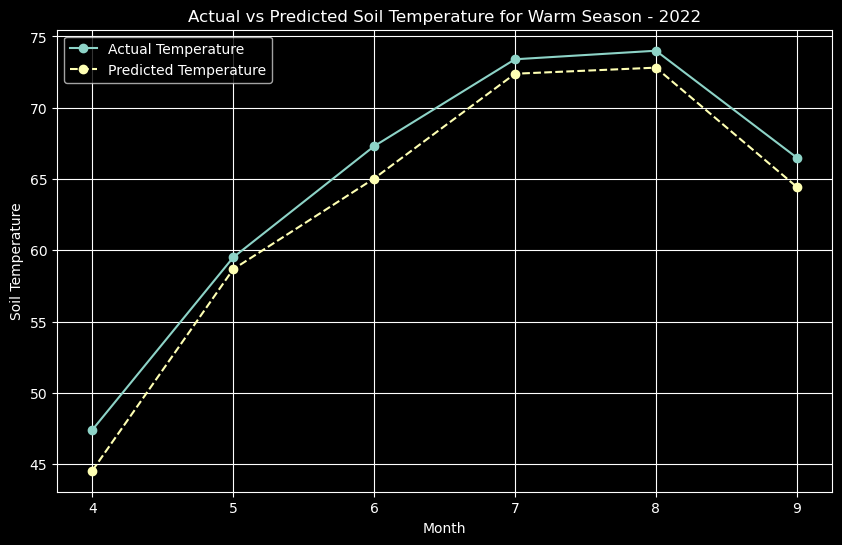

In [13]:
year_to_plot = 2022
filtered_data = data[data['date'].dt.year == year_to_plot]

# Segregate data into warm and cold seasons for the filtered year
warm_data_filtered = filtered_data[filtered_data['season'] == 'warm']

# Extract features and target for warm season
X_warm_filtered = warm_data_filtered[['airt', 'prec', 'slrt', 'wspd']]
Y_warm_filtered = warm_data_filtered[['s10t']]

# Predict soil temperature for the warm season
LRpredict_warm_filtered = LRmodel_warm.predict(X_warm_filtered)

predictions_warm_filtered = pd.DataFrame({
    'Month': warm_data_filtered['date'].dt.month,
    'Actual': Y_warm_filtered.values.flatten(),
    'Predicted': LRpredict_warm_filtered.flatten()
})

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(predictions_warm_filtered['Month'], predictions_warm_filtered['Actual'], label='Actual Temperature', marker='o')
plt.plot(predictions_warm_filtered['Month'], predictions_warm_filtered['Predicted'], label='Predicted Temperature', linestyle='--', marker='o')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Soil Temperature')
plt.title(f'Actual vs Predicted Soil Temperature for Warm Season - {year_to_plot}')
plt.legend()
plt.grid(True)
plt.show()

MSE for 2015: 4.755838892761079
MSE for 2016: 3.3548164207026345
MSE for 2017: 2.1005224939690073
MSE for 2018: 3.651119740851712
MSE for 2019: 0.9857647847700409
MSE for 2020: 2.722520233072672


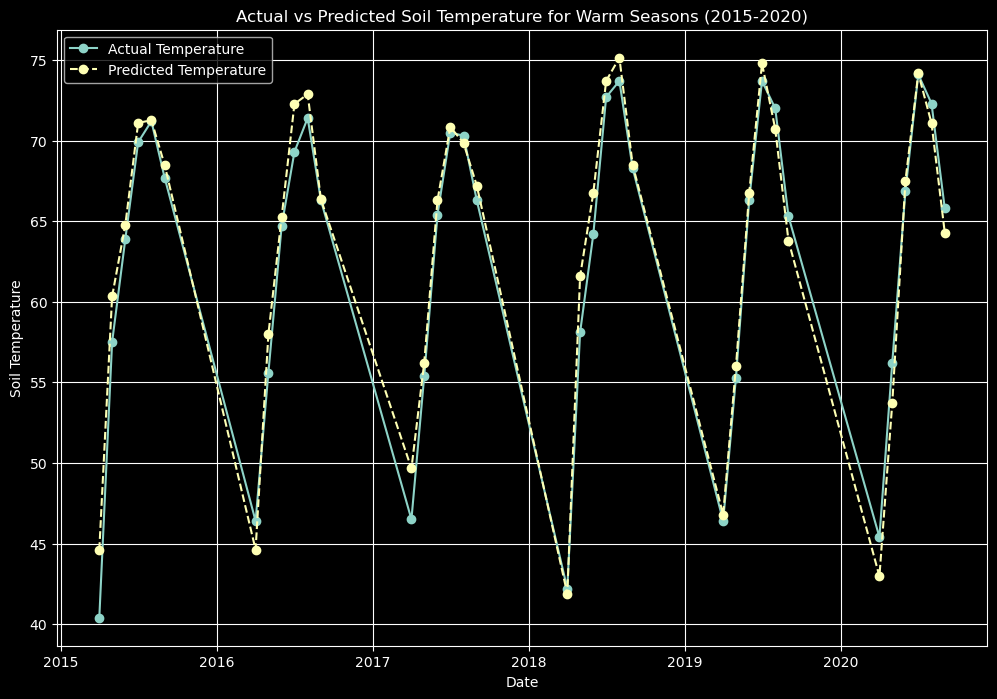

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assuming you have already defined LRmodel_warm and have loaded the 'data' DataFrame

# Define the years to plot
years_to_plot = list(range(2015, 2021))

# Create an empty DataFrame to store predictions for all years
all_predictions = pd.DataFrame()

# Create an empty list to store MSE values for each year
mse_values = []

# Loop through each year
for year_to_plot in years_to_plot:
    # Filter data for the current year
    filtered_data = data[data['date'].dt.year == year_to_plot]

    # Segregate data into warm and cold seasons for the filtered year
    warm_data_filtered = filtered_data[filtered_data['season'] == 'warm']

    # Extract features and target for warm season
    X_warm_filtered = warm_data_filtered[['airt', 'prec', 'slrt', 'wspd']]
    Y_warm_filtered = warm_data_filtered[['s10t']]

    # Predict soil temperature for the warm season
    LRpredict_warm_filtered = LRmodel_warm.predict(X_warm_filtered)

    # Calculate MSE for the current year
    mse = mean_squared_error(Y_warm_filtered, LRpredict_warm_filtered)
    
    # Append the MSE value to the list
    mse_values.append(mse)

    # Create a DataFrame for the current year's predictions
    predictions_warm_filtered = pd.DataFrame({
        'Date': pd.to_datetime(warm_data_filtered['date']),  # Combine Year and Month into a single date column
        'Actual': Y_warm_filtered.values.flatten(),
        'Predicted': LRpredict_warm_filtered.flatten()
    })

    # Append the current year's predictions to the overall predictions DataFrame
    all_predictions = pd.concat([all_predictions, predictions_warm_filtered])

# Sort the DataFrame by date for chronological order
all_predictions = all_predictions.sort_values('Date')

# Print the MSE values for each year
for i, year_to_plot in enumerate(years_to_plot):
    print(f'MSE for {year_to_plot}: {mse_values[i]}')

# Plotting the line chart
plt.figure(figsize=(12, 8))

# Plotting the lines
plt.plot(all_predictions['Date'], all_predictions['Actual'], label='Actual Temperature', marker='o')
plt.plot(all_predictions['Date'], all_predictions['Predicted'], label='Predicted Temperature', linestyle='--', marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Soil Temperature')
plt.title('Actual vs Predicted Soil Temperature for Warm Seasons (2015-2020)')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/50
6/6 [==============================] - 0s 11ms/step - loss: 0.9877 - val_loss: 0.8117
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.8853 - val_loss: 0.7288
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.7950 - val_loss: 0.6546
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.7094 - val_loss: 0.5863
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.6307 - val_loss: 0.5216
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.5606 - val_loss: 0.4590
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.4938 - val_loss: 0.4000
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.4308 - val_loss: 0.3455
Epoch 9/50
6/6 [==============================] - 0s 2ms/step - loss: 0.3740 - val_loss: 0.2946
Epoch 10/50
6/6 [==============================] - 0s 2ms/step - loss: 0.3203 - val_loss: 0.2481
Epoch 11/50
6/6 [=====================

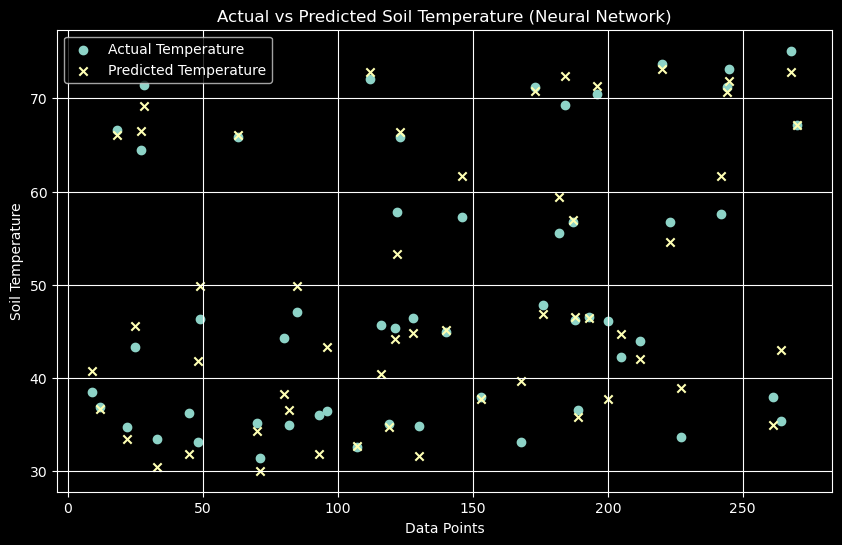

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Prepare data for neural network
X_neural = data[['airt', 'prec', 'slrt', 'wspd']]
Y_neural = data[['s10t']]

# Split data into training and testing sets
X_train_neural, X_test_neural, Y_train_neural, Y_test_neural = train_test_split(
    X_neural, Y_neural, test_size=0.2, random_state=42
)

# Standardize the data
scaler_X = StandardScaler()
X_train_neural_scaled = scaler_X.fit_transform(X_train_neural)
X_test_neural_scaled = scaler_X.transform(X_test_neural)

# Separate scaler for the target variable Y
scaler_Y = StandardScaler()
Y_train_neural_scaled = scaler_Y.fit_transform(Y_train_neural)

# Build the neural network model
model = Sequential()
model.add(Dense(16, input_dim=X_train_neural_scaled.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer with linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_neural_scaled, Y_train_neural_scaled, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

# Make predictions on the test set
Y_pred_neural_scaled = model.predict(X_test_neural_scaled)

# Inverse transform the scaled predictions to get actual values
Y_pred_neural = scaler_Y.inverse_transform(Y_pred_neural_scaled)

# Evaluate the model
mse_neural = mean_squared_error(Y_test_neural, Y_pred_neural)
print(f'Mean Squared Error (Neural Network): {mse_neural}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test_neural.index, Y_test_neural, label='Actual Temperature', marker='o')
plt.scatter(X_test_neural.index, Y_pred_neural, label='Predicted Temperature', marker='x')
plt.xlabel('Data Points')
plt.ylabel('Soil Temperature')
plt.title('Actual vs Predicted Soil Temperature (Neural Network)')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/50
3/3 [==============================] - 0s 27ms/step - loss: 1.7442 - val_loss: 1.5741
Epoch 2/50
3/3 [==============================] - 0s 6ms/step - loss: 1.6683 - val_loss: 1.5061
Epoch 3/50
3/3 [==============================] - 0s 6ms/step - loss: 1.5969 - val_loss: 1.4421
Epoch 4/50
3/3 [==============================] - 0s 6ms/step - loss: 1.5307 - val_loss: 1.3834
Epoch 5/50
3/3 [==============================] - 0s 5ms/step - loss: 1.4708 - val_loss: 1.3288
Epoch 6/50
3/3 [==============================] - 0s 5ms/step - loss: 1.4156 - val_loss: 1.2787
Epoch 7/50
3/3 [==============================] - 0s 5ms/step - loss: 1.3641 - val_loss: 1.2326
Epoch 8/50
3/3 [==============================] - 0s 5ms/step - loss: 1.3221 - val_loss: 1.1899
Epoch 9/50
3/3 [==============================] - 0s 5ms/step - loss: 1.2759 - val_loss: 1.1517
Epoch 10/50
3/3 [==============================] - 0s 5ms/step - loss: 1.2357 - val_loss: 1.1162
Epoch 11/50
3/3 [=====================

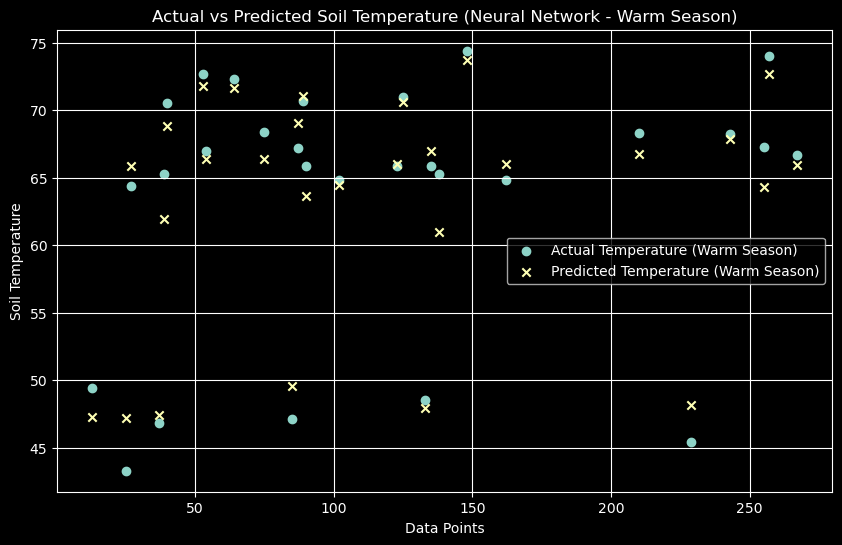

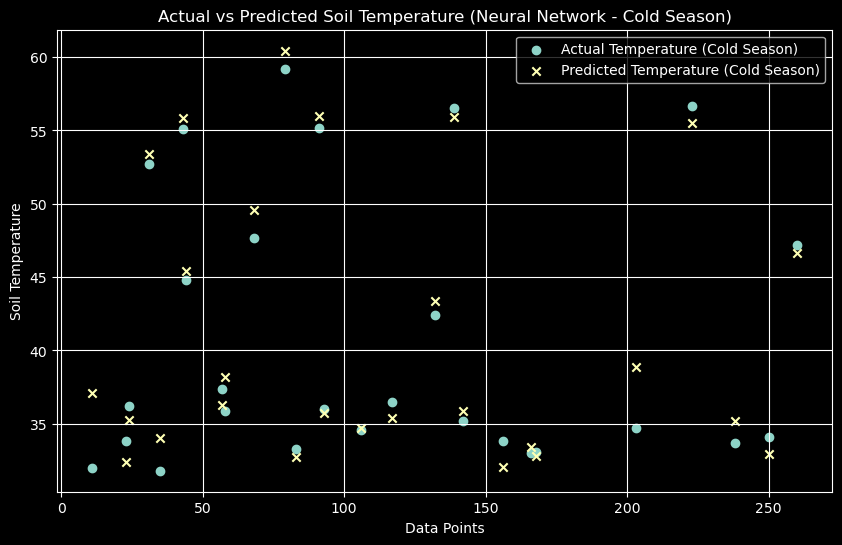

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Prepare data for neural network
X_neural = data[['airt', 'prec', 'slrt', 'wspd']]
Y_neural = data[['s10t']]

# Split data into warm and cold seasons
warm_data = data[data['season'] == 'warm']
cold_data = data[data['season'] == 'cold']

X_warm = warm_data[['airt', 'prec', 'slrt', 'wspd']]
Y_warm = warm_data[['s10t']]
X_cold = cold_data[['airt', 'prec', 'slrt', 'wspd']]
Y_cold = cold_data[['s10t']]

# Split warm data into training and testing sets
X_train_warm, X_test_warm, Y_train_warm, Y_test_warm = train_test_split(
    X_warm, Y_warm, test_size=0.2, random_state=42
)

# Split cold data into training and testing sets
X_train_cold, X_test_cold, Y_train_cold, Y_test_cold = train_test_split(
    X_cold, Y_cold, test_size=0.2, random_state=42
)

# Standardize the warm data
scaler_X_warm = StandardScaler()
X_train_warm_scaled = scaler_X_warm.fit_transform(X_train_warm)
X_test_warm_scaled = scaler_X_warm.transform(X_test_warm)

scaler_Y_warm = StandardScaler()
Y_train_warm_scaled = scaler_Y_warm.fit_transform(Y_train_warm)

# Build and train the warm model
model_warm = Sequential()
model_warm.add(Dense(16, input_dim=X_train_warm_scaled.shape[1], activation='relu'))
model_warm.add(Dense(8, activation='relu'))
model_warm.add(Dense(1, activation='linear'))  # Output layer with linear activation for regression
model_warm.compile(optimizer='adam', loss='mean_squared_error')
model_warm.fit(X_train_warm_scaled, Y_train_warm_scaled, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

# Make predictions on the warm test set
Y_pred_warm_scaled = model_warm.predict(X_test_warm_scaled)
Y_pred_warm = scaler_Y_warm.inverse_transform(Y_pred_warm_scaled)

# Evaluate the warm model
mse_warm = mean_squared_error(Y_test_warm, Y_pred_warm)
print(f'Mean Squared Error (Neural Network - Warm Season): {mse_warm}')

# Standardize the cold data
scaler_X_cold = StandardScaler()
X_train_cold_scaled = scaler_X_cold.fit_transform(X_train_cold)
X_test_cold_scaled = scaler_X_cold.transform(X_test_cold)

scaler_Y_cold = StandardScaler()
Y_train_cold_scaled = scaler_Y_cold.fit_transform(Y_train_cold)

# Build and train the cold model
model_cold = Sequential()
model_cold.add(Dense(16, input_dim=X_train_cold_scaled.shape[1], activation='relu'))
model_cold.add(Dense(8, activation='relu'))
model_cold.add(Dense(1, activation='linear'))  # Output layer with linear activation for regression
model_cold.compile(optimizer='adam', loss='mean_squared_error')
model_cold.fit(X_train_cold_scaled, Y_train_cold_scaled, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

# Make predictions on the cold test set
Y_pred_cold_scaled = model_cold.predict(X_test_cold_scaled)
Y_pred_cold = scaler_Y_cold.inverse_transform(Y_pred_cold_scaled)

# Evaluate the cold model
mse_cold = mean_squared_error(Y_test_cold, Y_pred_cold)
print(f'Mean Squared Error (Neural Network - Cold Season): {mse_cold}')

# Plotting the results for the warm model
plt.figure(figsize=(10, 6))
plt.scatter(X_test_warm.index, Y_test_warm, label='Actual Temperature (Warm Season)', marker='o')
plt.scatter(X_test_warm.index, Y_pred_warm, label='Predicted Temperature (Warm Season)', marker='x')
plt.xlabel('Data Points')
plt.ylabel('Soil Temperature')
plt.title('Actual vs Predicted Soil Temperature (Neural Network - Warm Season)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the results for the cold model
plt.figure(figsize=(10, 6))
plt.scatter(X_test_cold.index, Y_test_cold, label='Actual Temperature (Cold Season)', marker='o')
plt.scatter(X_test_cold.index, Y_pred_cold, label='Predicted Temperature (Cold Season)', marker='x')
plt.xlabel('Data Points')
plt.ylabel('Soil Temperature')
plt.title('Actual vs Predicted Soil Temperature (Neural Network - Cold Season)')
plt.legend()
plt.grid(True)
plt.show()


MSE for 2015: 4.755838892761079
MSE for 2016: 3.3548164207026345
MSE for 2017: 2.1005224939690073
MSE for 2018: 3.651119740851712
MSE for 2019: 0.9857647847700409
MSE for 2020: 2.722520233072672


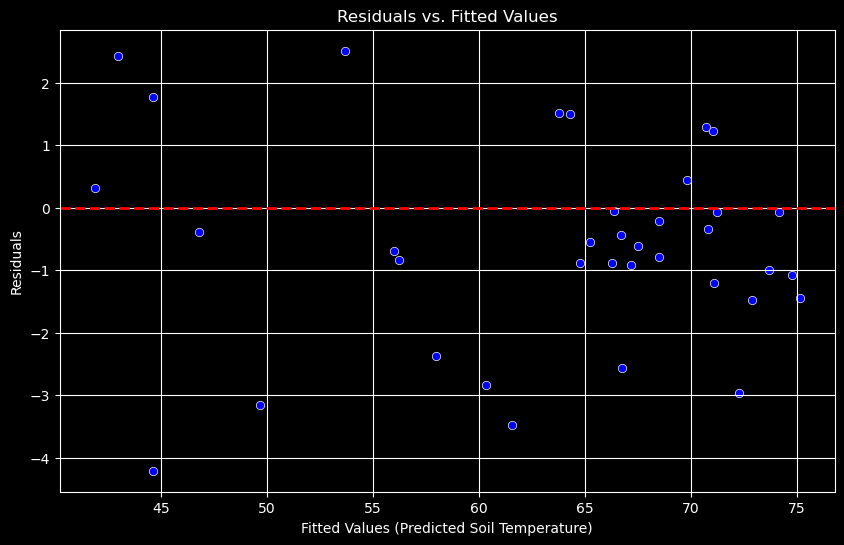

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# Assuming you have already defined LRmodel_warm and have loaded the 'data' DataFrame

# Define the years to plot
years_to_plot = list(range(2015, 2021))

# Create an empty DataFrame to store predictions and residuals for all years
all_results = pd.DataFrame()

# Loop through each year
for year_to_plot in years_to_plot:
    # Filter data for the current year
    filtered_data = data[data['date'].dt.year == year_to_plot]

    # Segregate data into warm and cold seasons for the filtered year
    warm_data_filtered = filtered_data[filtered_data['season'] == 'warm']

    # Extract features and target for warm season
    X_warm_filtered = warm_data_filtered[['airt', 'prec', 'slrt', 'wspd']]
    Y_warm_filtered = warm_data_filtered[['s10t']]

    # Predict soil temperature for the warm season
    LRpredict_warm_filtered = LRmodel_warm.predict(X_warm_filtered)

    # Calculate residuals for the current year
    residuals = Y_warm_filtered.values.flatten() - LRpredict_warm_filtered.flatten()

    # Create a DataFrame for the current year's results
    results_warm_filtered = pd.DataFrame({
        'Date': pd.to_datetime(warm_data_filtered['date']),  # Combine Year and Month into a single date column
        'Actual': Y_warm_filtered.values.flatten(),
        'Predicted': LRpredict_warm_filtered.flatten(),
        'Residuals': residuals
    })

    # Append the current year's results to the overall results DataFrame
    all_results = pd.concat([all_results, results_warm_filtered])

    # ... (rest of the loop)

# Sort the DataFrame by date for chronological order
all_results = all_results.sort_values('Date')

# Print the MSE values for each year
for i, year_to_plot in enumerate(years_to_plot):
    mse = mean_squared_error(all_results[all_results['Date'].dt.year == year_to_plot]['Actual'],
                              all_results[all_results['Date'].dt.year == year_to_plot]['Predicted'])
    print(f'MSE for {year_to_plot}: {mse}')

# Residuals vs. Fitted Values Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=all_results['Predicted'], y=all_results['Residuals'], color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values (Predicted Soil Temperature)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


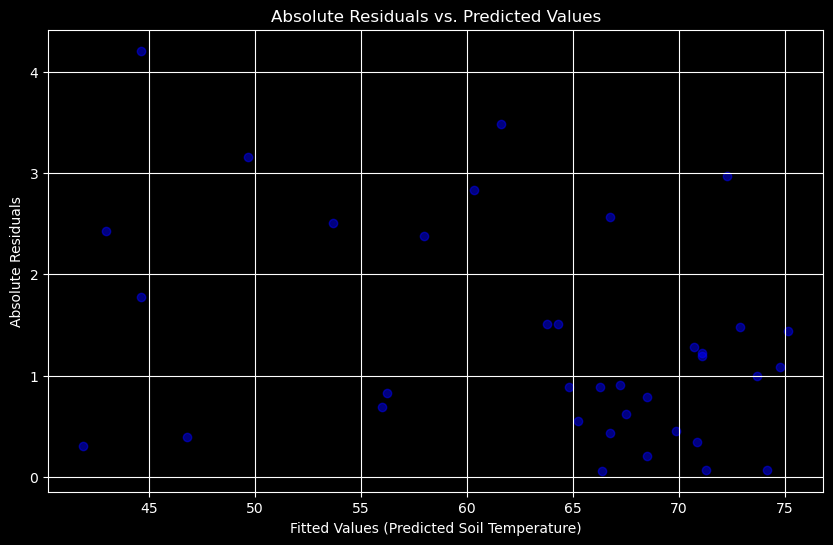

In [18]:
import matplotlib.pyplot as plt

# Calculate absolute residuals
absolute_residuals = abs(all_results['Residuals'])

# Plotting the Absolute Residuals vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(all_results['Predicted'], absolute_residuals, color='blue', alpha=0.5)
plt.title('Absolute Residuals vs. Predicted Values')
plt.xlabel('Fitted Values (Predicted Soil Temperature)')
plt.ylabel('Absolute Residuals')
plt.grid(True)
plt.show()


Shapiro-Wilk p-value for 2015: 0.31755387783050537
Shapiro-Wilk p-value for 2016: 0.8837253451347351
Shapiro-Wilk p-value for 2017: 0.17010897397994995
Shapiro-Wilk p-value for 2018: 0.8636379837989807
Shapiro-Wilk p-value for 2019: 0.12133949249982834
Shapiro-Wilk p-value for 2020: 0.4410829544067383


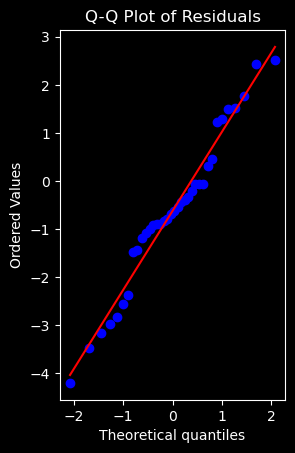

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from scipy import stats

# Assuming you have already defined LRmodel_warm and have loaded the 'data' DataFrame

# Define the years to plot
years_to_plot = list(range(2015, 2021))

# Create an empty DataFrame to store predictions and residuals for all years
all_results = pd.DataFrame()

# Lists to store p-values for the Shapiro-Wilk test
shapiro_p_values = []

# Loop through each year
for year_to_plot in years_to_plot:
    # Filter data for the current year
    filtered_data = data[data['date'].dt.year == year_to_plot]

    # Segregate data into warm and cold seasons for the filtered year
    warm_data_filtered = filtered_data[filtered_data['season'] == 'warm']

    # Extract features and target for warm season
    X_warm_filtered = warm_data_filtered[['airt', 'prec', 'slrt', 'wspd']]
    Y_warm_filtered = warm_data_filtered[['s10t']]

    # Predict soil temperature for the warm season
    LRpredict_warm_filtered = LRmodel_warm.predict(X_warm_filtered)

    # Calculate residuals for the current year
    residuals = Y_warm_filtered.values.flatten() - LRpredict_warm_filtered.flatten()

    # Shapiro-Wilk test for normality
    _, shapiro_p_value = stats.shapiro(residuals)
    shapiro_p_values.append(shapiro_p_value)

    # Create a DataFrame for the current year's results
    results_warm_filtered = pd.DataFrame({
        'Date': pd.to_datetime(warm_data_filtered['date']),  # Combine Year and Month into a single date column
        'Actual': Y_warm_filtered.values.flatten(),
        'Predicted': LRpredict_warm_filtered.flatten(),
        'Residuals': residuals
    })

    # Append the current year's results to the overall results DataFrame
    all_results = pd.concat([all_results, results_warm_filtered])

    # ... (rest of the loop)

# Sort the DataFrame by date for chronological order
all_results = all_results.sort_values('Date')

# Print the MSE values and Shapiro-Wilk p-values for each year
for i, year_to_plot in enumerate(years_to_plot):
    mse = mean_squared_error(all_results[all_results['Date'].dt.year == year_to_plot]['Actual'],
                              all_results[all_results['Date'].dt.year == year_to_plot]['Predicted'])
    #print(f'MSE for {year_to_plot}: {mse}')
    print(f'Shapiro-Wilk p-value for {year_to_plot}: {shapiro_p_values[i]}')


# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(all_results['Residuals'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


Mean Squared Error for the Testing Period: 6.217068622871791


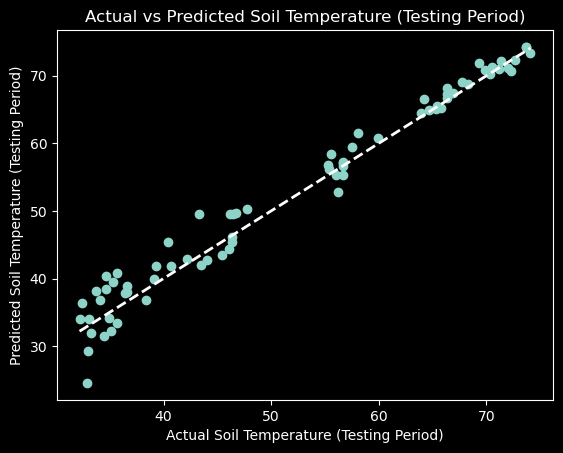

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

data = pd.read_csv('monthly.csv')

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Define the training period
train_start_date = '2005-01-01'
train_end_date = '2010-12-31'

# Define the testing period
test_start_date = '2015-01-01'
test_end_date = '2020-12-31'

# Filter data for training and testing periods
train_data = data[(data['date'] >= train_start_date) & (data['date'] <= train_end_date)]
test_data = data[(data['date'] >= test_start_date) & (data['date'] <= test_end_date)]

# Drop NaN values and extract data to X and Y variables for training
train_data = train_data.dropna(subset=['s10t'])
X_train = train_data[['airt', 'prec', 'slrt', 'wspd']]
Y_train = train_data[['s10t']]

# Drop NaN values and extract data to X and Y variables for testing
test_data = test_data.dropna(subset=['s10t'])
X_test = test_data[['airt', 'prec', 'slrt', 'wspd']]
Y_test = test_data[['s10t']]

# Train the linear regression model
LRmodel = LinearRegression()
LRmodel.fit(X_train, Y_train)

# Predict soil temperature for the testing period
LRpredict = LRmodel.predict(X_test)

# Evaluate and print the mean squared error
mse = mean_squared_error(Y_test, LRpredict)
print(f'Mean Squared Error for the Testing Period: {mse}')

# Plot the results
plt.scatter(Y_test, LRpredict) 
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color='white', lw=2)  # y = x line
plt.xlabel('Actual Soil Temperature (Testing Period)')
plt.ylabel('Predicted Soil Temperature (Testing Period)')
plt.title('Actual vs Predicted Soil Temperature (Testing Period)')
plt.show()
